In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Loading Dataframes

In [2]:
train=pd.read_csv("Corona_NLP_train.csv", encoding = "ISO-8859-1")
test=pd.read_csv("Corona_NLP_test.csv", encoding = "ISO-8859-1")

## 2. Explotary Data Analysis

### checking out dfs

In [3]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


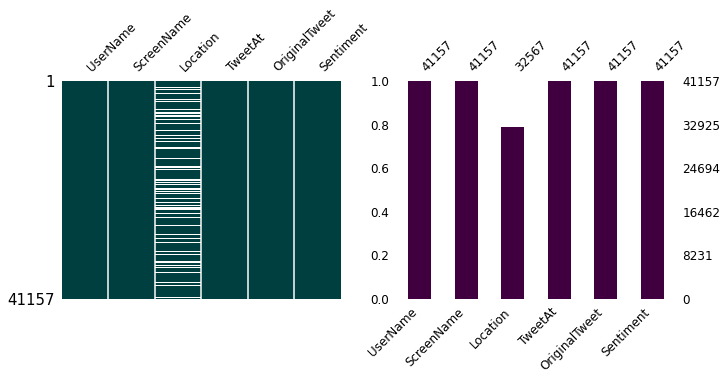

In [5]:
import missingno as msno
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
msno.matrix(train, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(train, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

In [6]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [7]:
test.info()  # same dtypes with train df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


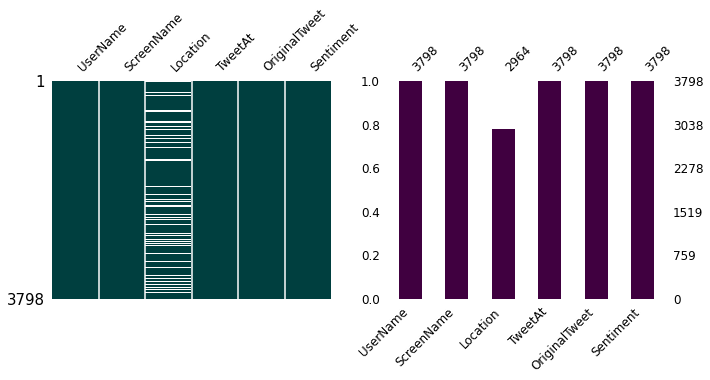

In [8]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
msno.matrix(test, ax=ax1, sparkline=False, fontsize = 12, color=(0., 0.25, 0.25))
msno.bar(test, ax=ax2, fontsize = 12, color=(0.25, 0., 0.25))
plt.show()

### tweet locations

In [9]:
train.Location.value_counts().head(10)

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

In [10]:
train.Location = train.Location.str.split(",").str[0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


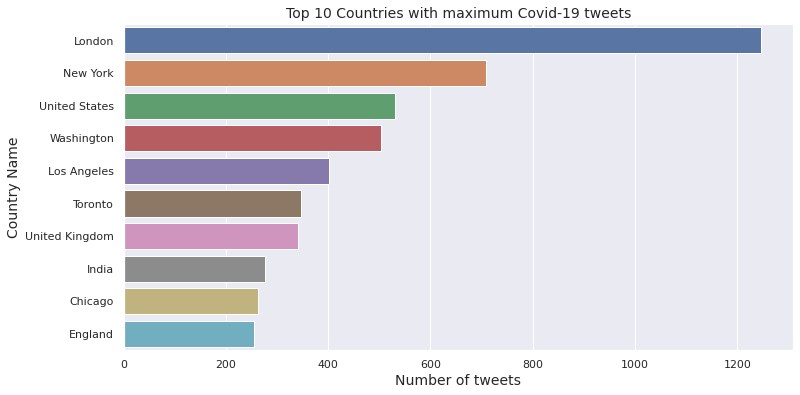

In [11]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11,4)})

plt.figure(figsize=(12, 6))
sns.barplot(train["Location"].value_counts().values[:10],
            train["Location"].value_counts().index[:10]);
plt.title("Top 10 Countries with maximum Covid-19 tweets", fontsize=14)
plt.xlabel("Number of tweets", fontsize=14)
plt.ylabel("Country Name", fontsize=14)
plt.show()

### tweet sentiment values

In [12]:
train['Sentiment'].value_counts() 

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

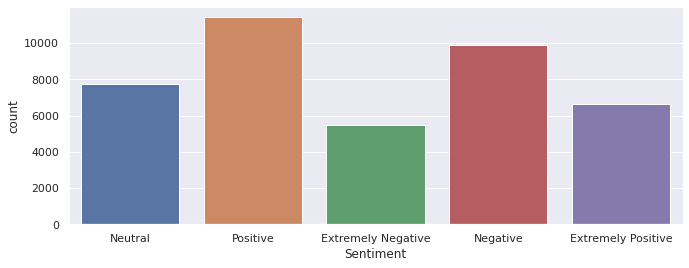

In [13]:
sns.countplot(x = "Sentiment", data = train)

### regrouping train and test dfs

In [14]:
encoding = {'Extremely Negative': 0,
            'Negative': 0,
            'Neutral': 1,
            'Positive':2,
            'Extremely Positive': 2
           }

labels = ['Negative', 'Neutral', 'Positive']
           
train["Sentiment"].replace(encoding, inplace=True)
test["Sentiment"].replace(encoding, inplace=True)

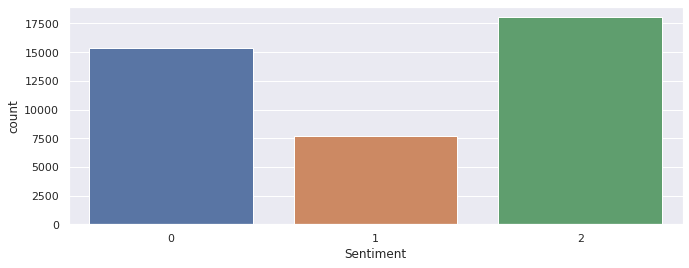

In [15]:
sns.countplot(x = "Sentiment", data = train)

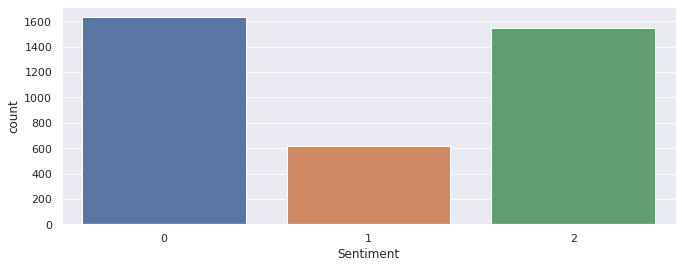

In [16]:
sns.countplot(x = "Sentiment", data = test)

### analysis of locations with sentiment

In [17]:
loc_with_sentiment = train.iloc[:, [2,5]]


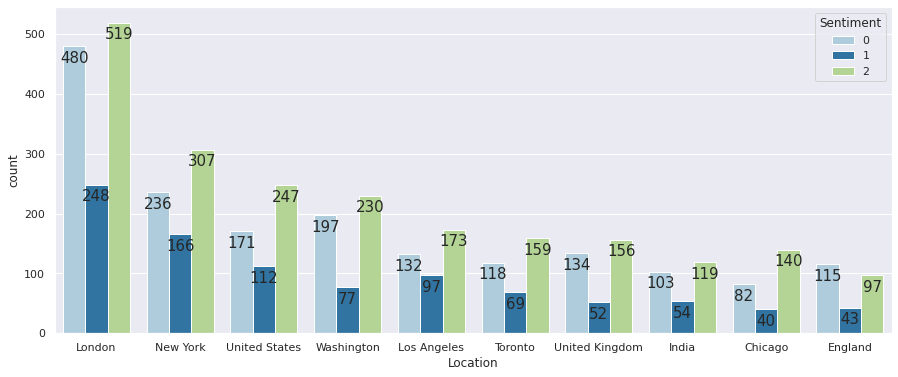

In [18]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x = "Location", hue = "Sentiment", data = loc_with_sentiment, 
              order = train.Location.value_counts()[:10].index, orient = "h", palette = "Paired") 

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()

## hashtags

In [19]:
import regex as re

def extract_hash_tags(s):
    hashes = re.findall(r"#(\w+)", s)
    return " ".join(hashes)
    
train['hashtags'] = train['OriginalTweet'].apply(lambda x : extract_hash_tags(x))

In [20]:
from collections import Counter

allHashTags = list(train[(train['hashtags'] != None) & (train['hashtags'] != "")]['hashtags'])
allHashTags = [tag.lower() for tag in allHashTags]
hash_df = dict(Counter(allHashTags))
top_hash_df = pd.DataFrame(list(hash_df.items()),columns = ['word','count']).reset_index(drop=True).sort_values('count',ascending=False)[:15]
top_hash_df.head()

,word,count
7,coronavirus,3354
2,covid_19,723
17,covid2019,420
8,coronavirus covid19,349
134,covid19 coronavirus,257


In [21]:
import plotly.express as px

fig = px.bar(x=top_hash_df['word'],y=top_hash_df['count'],
       orientation='v',
       color=top_hash_df['word'],
       text=top_hash_df['count'],
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=1000, 
                  showlegend=False, 
                  xaxis_title="Word",
                  yaxis_title="Count",
                  title="Top #hashtags in Covid19 Tweets")
fig.show()

## mentions

In [22]:
def get_mentions(s):
    mentions = re.findall("(?<![@\w])@(\w{1,25})", s)
    return " ".join(mentions)
train['mentions'] = train['OriginalTweet'].apply(lambda x : get_mentions(x))

In [23]:
allMentions = list(train[(train['mentions'] != None) & (train['mentions'] != "")]['mentions'])
allMentions = [tag.lower() for tag in allMentions]
mentions_df = dict(Counter(allMentions))
top_mentions_df = pd.DataFrame(list(mentions_df.items()),columns = ['word','count']).reset_index(drop=True).sort_values('count',ascending=False)[:15]
top_mentions_df.head()

,word,count
32,realdonaldtrump,129
49,youtube,74
408,tesco,66
62,amazon,63
37,borisjohnson,62


In [24]:
fig = px.bar(x=top_mentions_df['word'],y=top_mentions_df['count'],
       orientation='v',
       color=top_mentions_df['word'],
       text=top_mentions_df['count'],
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=1000, 
                  showlegend=False, 
                  xaxis_title="Word",
                  yaxis_title="Count",
                  title="Top #mentions in Covid19 Tweets")
fig.show()

In [25]:
train.drop(["hashtags", "mentions"], axis =1, inplace = True)

### tweet times

In [26]:
train["TweetAt"] = pd.to_datetime(train["TweetAt"])
train["TweetAt"].apply(lambda x : x.dayofweek).value_counts()

2    7440
1    6892
3    6234
4    6067
5    5916
0    5364
6    3244
Name: TweetAt, dtype: int64

Text(0.5, 1.0, 'maximun tweets during 2020')

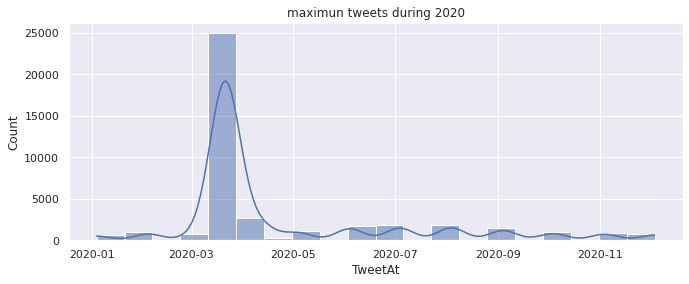

In [27]:
sns.histplot(train["TweetAt"], kde = True, bins = 20)
plt.title("maximun tweets during 2020")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



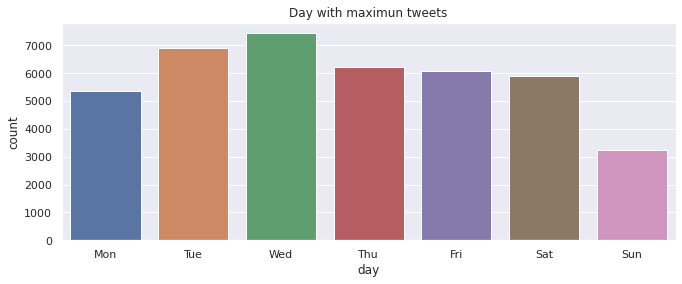

In [28]:
train["TweetAt"] = pd.to_datetime(train["TweetAt"])
train["day"] = train["TweetAt"].apply(lambda x : x.dayofweek)
dmap = {0: 'Mon', 1: 'Tue', 2:'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
train["day"] = train["day"].map(dmap)
plt.title("Day with maximun tweets")
sns.countplot(train["day"])


In [29]:
train.drop("day", axis = 1, inplace = True)

### making cheack points and dropping duplicated rows

In [30]:
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)

In [31]:
train_df = train.copy()
test_df = test.copy()

## 3. Text Mining

In [32]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import TweetTokenizer

In [34]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
sentences = train['OriginalTweet'][:5]

for i in sentences[3:4]:
    print("Original:\n")
    print(i)
    print('\nTensorflow Tokenizer\n:')
    a = Tokenizer()
    a.fit_on_texts([i])
    print(a.word_index)
    print("\nTweet Tokenizer:\n")
    print(TweetTokenizer().tokenize(i))
    print('\nNLTK word_tokenizer:\n')
    print(word_tokenize(i))

Original:






#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j

Tensorflow Tokenizer
:
{'\r\r': 1, 'food': 2, 'is': 3, 'not': 4, 'you': 5, 'stay': 6, 'my': 7, 'stock': 8, 'the': 9, 'only': 10, 'one': 11, 'which': 12, 'empty': 13, 'please': 14, "don't": 15, 'panic': 16, 'there': 17, 'will': 18, 'be': 19, 'enough': 20, 'for': 21, 'everyone': 22, 'if': 23, 'do': 24, 'take': 25, 'more': 26, 'than': 27, 'need': 28, 'calm': 29, 'safe': 30, 'covid19france': 31, 'covid': 32, '19': 33, 'covid19': 34, 'coronavirus': 35, 'confinement': 36, 'confinementotal': 37, 'confinementgeneral': 38, 'https': 39, 't': 40, 'co': 41, 'zrlg0z520j': 42}

Tweet Tokenizer:

['My', 'food', 'stock', 'is', 'not', 'the', 'only', 'one', 'which', 'is', 'empty', '...', 'PLEASE', ',', "don't", 'panic', ',', 'THERE', 'WILL', 'BE', 'ENOUGH', 'FOOD', 'FOR', 'EVERYONE', 'if', 'you', 'do', 'not', 'take', 'more', 'than', 'you', 'need', '.', 'Stay', 'calm',

#### As you can see these all yield different results and you have to see which works best for your use case. 
#### For now we will use NLTK Tweet-Tokenizer.

In [36]:
stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

def cleaning(data):
    #1. Remove urls 
    tweet_without_url = re.sub(r'http\S+', ' ', data)
    
    #2. Remove hashtags
    tweet_without_hashtag = re.sub(r'#\w+',' ', tweet_without_url)
    
    #3. Remove mentions and characters that not in the English alphabets
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    #2. Tokenize
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)
    
    #3. Remove Puncs
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    #6. Joining
    return " ".join(text_cleaned)


In [37]:
train_df['OriginalTweet'] = train_df['OriginalTweet'].apply(lambda x: cleaning(x))

In [38]:
pd.set_option('display.max_colwidth', -1)  
train_df.iloc[:, [4,5]].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,OriginalTweet,Sentiment
0,,1
1,advice Talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist GP set online shopping account po adequate supply regular med order,2
2,Coronavirus Australia Woolworths give elderly disabled dedicated shopping hour amid COVID outbreak,2
3,My food stock one empty PLEASE panic THERE WILL BE ENOUGH FOOD FOR EVERYONE take need Stay calm stay safe,2
4,Me ready go supermarket outbreak Not I paranoid food stock litteraly empty The serious thing please panic It cause shortage,0


In [39]:
test_df['OriginalTweet'] = test_df['OriginalTweet'].apply(lambda x: cleaning(x))

In [40]:
pd.set_option('display.max_colwidth', -1)  
test_df.iloc[:, [4,5]].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,OriginalTweet,Sentiment
0,TRENDING New Yorkers encounter empty supermarket shelf pictured Wegmans Brooklyn sold online grocer FoodKick MaxDelivery fearing shopper stock,0
1,When I find hand sanitizer Fred Meyer I turned But pack Purell Check concern driving price,2
2,Find protect loved one,2
3,buying hit City anxious shopper stock food amp medical supply worker becomes st confirmed patient OR staged event,0
4,One week everyone buying baby milk powder next everyone buying toilet paper,1


## uni grams for train tweets

In [41]:
HQ_words = ' '.join([i for i in train_df['OriginalTweet']]).split() 
unigram_HQ = pd.Series(nltk.ngrams(HQ_words, 1)).value_counts()[:15]
unigram_HQ = pd.DataFrame(unigram_HQ)
unigram_HQ['idx'] = unigram_HQ.index
unigram_HQ['idx'] = unigram_HQ.apply(lambda x: '('+x['idx'][0]+')',axis=1)

In [42]:
import plotly.graph_objs as go
import plotly.offline as pyoff

plot_data = [
    go.Bar(
        x=unigram_HQ['idx'],
        y=unigram_HQ[0],
        marker = dict(
            color = 'Blue'
        )
    )
]
plot_layout = go.Layout(
        title='Top 15 uni-grams from Covid-19 Tweets',
        yaxis_title='Count',
        xaxis_title='Uni-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

## Bi-grams for Tweets

In [43]:
bigram_HQ = (pd.Series(nltk.ngrams(HQ_words, 2)).value_counts())[:15]
bigram_HQ = pd.DataFrame(bigram_HQ)
bigram_HQ['idx'] = bigram_HQ.index
bigram_HQ['idx'] = bigram_HQ.apply(lambda x: '('+x['idx'][0]+', '+x['idx'][1]+')',axis=1)

In [44]:
plot_data = [
    go.Bar(
        x=bigram_HQ['idx'],
        y=bigram_HQ[0],
        marker = dict(
            color = 'Red'
        )
    )
]
plot_layout = go.Layout(
        title='Top 15 bi-grams from Covid 19 Tweets',
        yaxis_title='Count',
        xaxis_title='bi-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

## Tri-grams for Tweets

In [45]:
trigram_HQ = (pd.Series(nltk.ngrams(HQ_words, 3)).value_counts())[:20]
trigram_HQ = pd.DataFrame(trigram_HQ)
trigram_HQ['idx'] = trigram_HQ.index
trigram_HQ['idx'] = trigram_HQ.apply(lambda x: '('+x['idx'][0]+', '+x['idx'][1]+', '+x['idx'][2]+')',axis=1)

In [46]:
plot_data = [
    go.Bar(
        x=trigram_HQ['idx'],
        y=trigram_HQ[0],
        marker = dict(
            color = 'Green'
        )
    )
]
plot_layout = go.Layout(
        title='Top 15 Tri-grams from Covid 19 Tweets',
        yaxis_title='Count',
        xaxis_title='Tri-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

## 4. WordCloud - Repetition of Words¶

In [47]:
from wordcloud import WordCloud

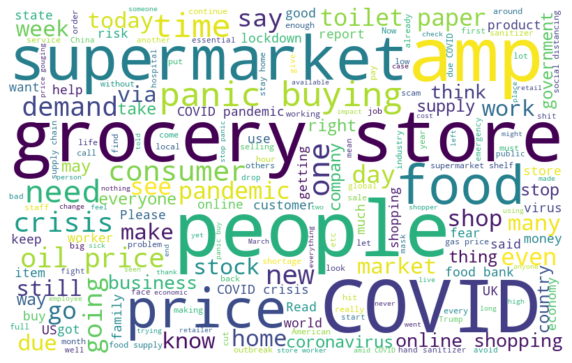

In [48]:
Positive = ' '.join([tweet for tweet in train_df['OriginalTweet'][train_df['Sentiment'] == 0]])

wordcloud = WordCloud(background_color = "white", width = 800, height = 500,
                      random_state = 21, max_font_size = 110).generate(Positive)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

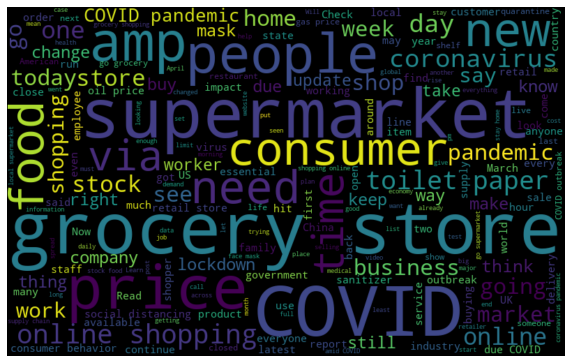

In [49]:
Negative = ' '.join([tweet for tweet in train_df['OriginalTweet'][train_df['Sentiment'] == 1]])

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(Negative)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## 5. Sentiment Analysis Models 




In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Bidirectional, SpatialDropout1D

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [51]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df["OriginalTweet"])  # fitting tokenizer on training_datase

X = tokenizer.texts_to_sequences(train_df["OriginalTweet"])  # getting text sequences from training dataframe
y = train_df["Sentiment"]

vocab_size = len(tokenizer.word_index) + 1

In [52]:
vocab_size

30593

In [53]:
print("Vocabulary size: {}".format(vocab_size))
print("\n----------Example----------\n")
print("Sentence:\n{}".format(train_df["OriginalTweet"][6]))
print("\nAfter tokenizing :\n{}".format(X[6]))

X = pad_sequences(X, padding='post')  # adding padding of zeros to obtain uniform length for all sequences
print("\nAfter padding :\n{}".format(X[6]))

Vocabulary size: 30593

----------Example----------

Sentence:
Cashier grocery store sharing insight To prove credibility commented I Civics class I know I talking

After tokenizing :
[590, 7, 4, 1208, 654, 107, 2646, 8740, 8741, 2, 16152, 1030, 2, 71, 2, 878]

After padding :
[  590     7     4  1208   654   107  2646  8740  8741     2 16152  1030
     2    71     2   878     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0]


In [54]:
X.shape

(41157, 54)

### a. Modeling with LSTM

In [55]:
# hyper parameters
EPOCHS = 3
BATCH_SIZE = 32 
embedding_dim = 16
units = 256

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))  # This version performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.
model.add(LSTM(units, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(3,activation = 'softmax'))  # we have 3 categories so we have to use softmax 
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 54, 16)            489488    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 54, 16)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               279552    
_________________________________________________________________
dense (Dense)                (None, 3)                 771       
Total params: 769,811
Trainable params: 769,811
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
Y = pd.get_dummies(train['Sentiment']).values  
# categorical cross entropy requires get_dummies cause of it only accepts [0]s and [1]s

print(X.shape,Y.shape)


(41157, 54) (41157, 3)


In [57]:
model.fit(X, Y, epochs = 5, validation_split = 0.12, batch_size = BATCH_SIZE)

Epoch 1/5
1132/1132 [==============================] - 391s 343ms/step - loss: 1.0490 - accuracy: 0.4319 - val_loss: 1.0511 - val_accuracy: 0.4527
Epoch 2/5
1132/1132 [==============================] - 387s 342ms/step - loss: 1.0437 - accuracy: 0.4361 - val_loss: 1.0522 - val_accuracy: 0.4527
Epoch 3/5
1132/1132 [==============================] - 390s 344ms/step - loss: 1.0423 - accuracy: 0.4352 - val_loss: 1.0517 - val_accuracy: 0.4527
Epoch 4/5
1132/1132 [==============================] - 389s 343ms/step - loss: 1.0451 - accuracy: 0.4368 - val_loss: 1.0539 - val_accuracy: 0.4527
Epoch 5/5
1132/1132 [==============================] - 389s 344ms/step - loss: 1.0414 - accuracy: 0.4377 - val_loss: 1.0565 - val_accuracy: 0.4527


#### results of LSTM model

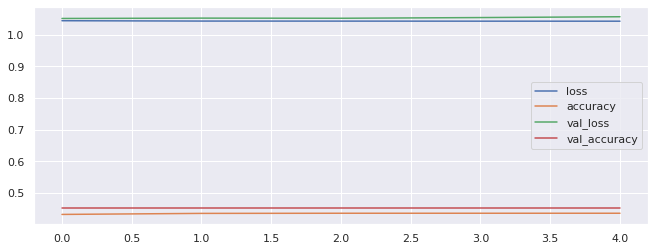

In [58]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## b. Modeling with Bidirectional LSTM

In [59]:
tf.keras.backend.clear_session()


model_blstm = tf.keras.Sequential([
    Layers.Embedding(vocab_size, embedding_dim, input_length = X.shape[1]),
    Layers.Bidirectional(Layers.LSTM(units, return_sequences = True)),  # recurrent layer with lstm
    Layers.GlobalMaxPool1D(),  # Downsamples the input representation by taking the maximum value over the target
    Layers.Dropout(0.2),
    Layers.Dense(64, activation = "relu"),
    Layers.Dropout(0.2),
    Layers.Dense(3, activation = 'softmax')
])

In [60]:
model_blstm.compile(loss = SparseCategoricalCrossentropy(from_logits = True),  # Computes the crossentropy loss between the labels and predictions.
              optimizer = 'adam', metrics = ['accuracy'])

In [61]:
model_blstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 54, 16)            489488    
_________________________________________________________________
bidirectional (Bidirectional (None, 54, 512)           559104    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [62]:
model_blstm.fit(X, y, epochs = EPOCHS, validation_split = 0.12, batch_size = BATCH_SIZE)

Epoch 1/3
1132/1132 [==============================] - 389s 341ms/step - loss: 0.8658 - accuracy: 0.5739 - val_loss: 0.4063 - val_accuracy: 0.8621
Epoch 2/3
1132/1132 [==============================] - 381s 337ms/step - loss: 0.3546 - accuracy: 0.8853 - val_loss: 0.3716 - val_accuracy: 0.8751
Epoch 3/3
1132/1132 [==============================] - 384s 339ms/step - loss: 0.2325 - accuracy: 0.9266 - val_loss: 0.4138 - val_accuracy: 0.8601


#### Results of Bi-LSTM model

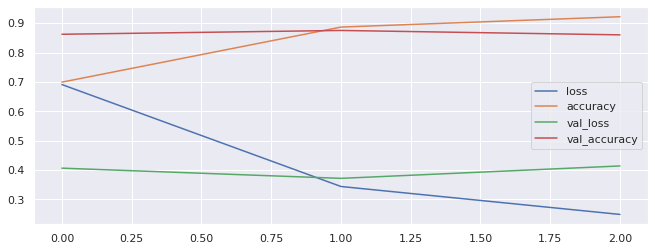

In [63]:
model_blstm_loss = pd.DataFrame(model_blstm.history.history)
model_blstm_loss.plot()

## c. Modeling with CNN

In [64]:
model_cnn = Sequential()
model_cnn.add(Embedding(vocab_size,embedding_dim,input_length=X.shape[1]))

model_cnn.add(Conv1D(64, kernel_size=3, padding='same', activation='relu', strides=1))
# This layer creates a convolution kernel that is convolved with the layer input over a single spatial 
# (or temporal) dimension to produce a tensor of outputs.

model_cnn.add(GlobalMaxPooling1D()) 
# Downsamples the input representation by taking the maximum value over the dimension.

model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.2))

model_cnn.add(Dense(3,activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy',optimizer= 'adam',metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 54, 16)            489488    
_________________________________________________________________
conv1d (Conv1D)              (None, 54, 64)            3136      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 501,331
Trainable params: 501,331
Non-trainable params: 0
________________________________________________

In [65]:
model_cnn.fit(X, Y, validation_split = 0.12,epochs=2, batch_size=BATCH_SIZE)

Epoch 1/2
1132/1132 [==============================] - 14s 11ms/step - loss: 0.7937 - accuracy: 0.6262 - val_loss: 0.4051 - val_accuracy: 0.8658
Epoch 2/2
1132/1132 [==============================] - 13s 11ms/step - loss: 0.3271 - accuracy: 0.8914 - val_loss: 0.3901 - val_accuracy: 0.8678


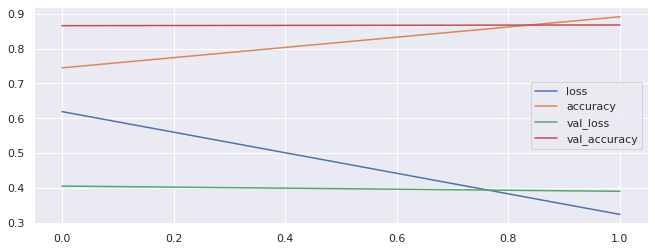

In [66]:
model_cnn_loss = pd.DataFrame(model_cnn.history.history)
model_cnn_loss.plot()

## 6. Evaluation

### Preprocessing test data 

In [67]:
X_test = test['OriginalTweet'].copy()
y_test = test['Sentiment'].copy()

X_test = X_test.apply(cleaning)

X_test = tokenizer.texts_to_sequences(X_test)

X_test = pad_sequences(X_test, padding='post')

### Making Predictions with Bi-LSTM

In [68]:
pred = np.argmax(model.predict(X_test), axis=-1)

### Model Results

In [69]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1633
           1       0.00      0.00      0.00       619
           2       0.41      1.00      0.58      1546

    accuracy                           0.41      3798
   macro avg       0.14      0.33      0.19      3798
weighted avg       0.17      0.41      0.24      3798



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



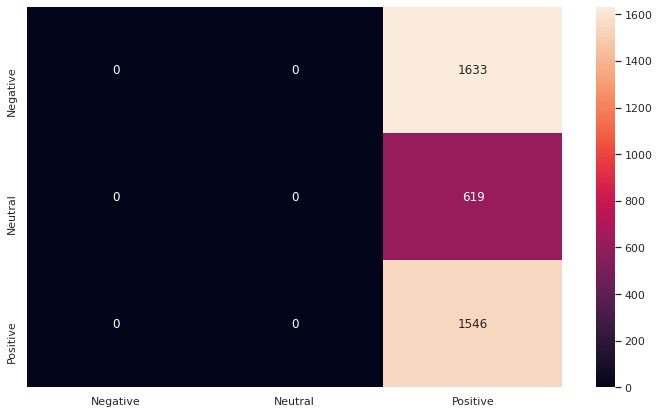

In [70]:
conf = confusion_matrix(y_test, pred)

cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)

plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()